# Regression Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pingouin
import sklearn
import statsmodels as stats

In [2]:
df_60 = pd.read_csv("data/dataset-of-60s-clean.csv")
df_70 = pd.read_csv("data/dataset-of-70s-clean.csv")
df_80 = pd.read_csv("data/dataset-of-80s-clean.csv")
df_90 = pd.read_csv("data/dataset-of-90s-clean.csv")
df_00 = pd.read_csv("data/dataset-of-00s-clean.csv")
df_10 = pd.read_csv("data/dataset-of-10s-clean.csv")
df_all = pd.read_csv("data/dataset-alldecades-clean.csv")
#pop_df = pd.read_csv("data/song_data.csv")

------------------------------------------------------------

## Model 1: Linear Regression

------------------------------------------------------------

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from numpy import mean, absolute, sqrt

In [4]:
features = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_min', 'time_signature', 'chorus_hit',
       'sections']
x = df_all[features]
y = df_all["target"]

x_train, x_test, y_train, y_test = train_test_split(x[features], y, train_size = 0.8, random_state = 8)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.2598722832945003

In [5]:
y_predictor = model.predict(x_test)

print("R2 = ", metrics.r2_score(y_test, y_predictor))
print("MAE = ", metrics.mean_absolute_error(y_test, y_predictor))
print("MSE = ", metrics.mean_squared_error(y_test, y_predictor))
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test, y_predictor)))

R2 =  0.2598722832945003
MAE =  0.38849556909165184
MSE =  0.1849950986682591
RMSE =  0.4301105656319769


-------------------------------------------------------------

## Model 2: Decision Tree

-------------------------------------------------------------

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree

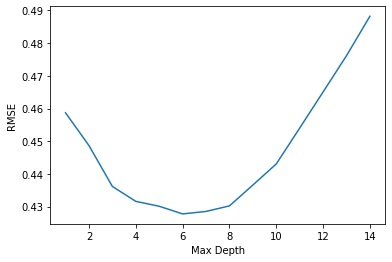

In [7]:
RMSE_scores = []

for depth in range(1, 15):
    dtr_reg = DecisionTreeRegressor(max_depth = depth, random_state = 1)
    MSE_scores = cross_val_score(dtr_reg, x, y, cv = 5, scoring = 'neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
    
plt.plot(range(1, 15), RMSE_scores);
plt.xlabel('Max Depth');
plt.ylabel('RMSE');

In [8]:
dtr_reg = DecisionTreeRegressor(max_depth = 6, random_state = 1)
dtr_reg.fit(x, y)

DecisionTreeRegressor(max_depth=6, random_state=1)

In [9]:
dtr_y_pred = dtr_reg.predict(x_test)

In [10]:
print("R2 = ", metrics.r2_score(y_test, dtr_y_pred))
print("MAE = ", metrics.mean_absolute_error(y_test, dtr_y_pred))
print("MSE = ", metrics.mean_squared_error(y_test, dtr_y_pred))
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test, dtr_y_pred)))

R2 =  0.34594918994857904
MAE =  0.3273947709244449
MSE =  0.1634801553954807
RMSE =  0.4043267928241717


In [11]:
pd.DataFrame({'feature':features, 'importance':dtr_reg.feature_importances_}).sort_values(by = 'importance', ascending = False)

,feature,importance
7,instrumentalness,0.550898
6,acousticness,0.159190
0,danceability,0.122426
5,speechiness,0.060675
1,energy,0.047099
11,duration_min,0.026286
9,valence,0.017928
4,mode,0.005972
14,sections,0.003849
10,tempo,0.002313


In [14]:
sorted(zip(RMSE_scores, range(1, 15)))[0]

(0.4277607546352359, 6)

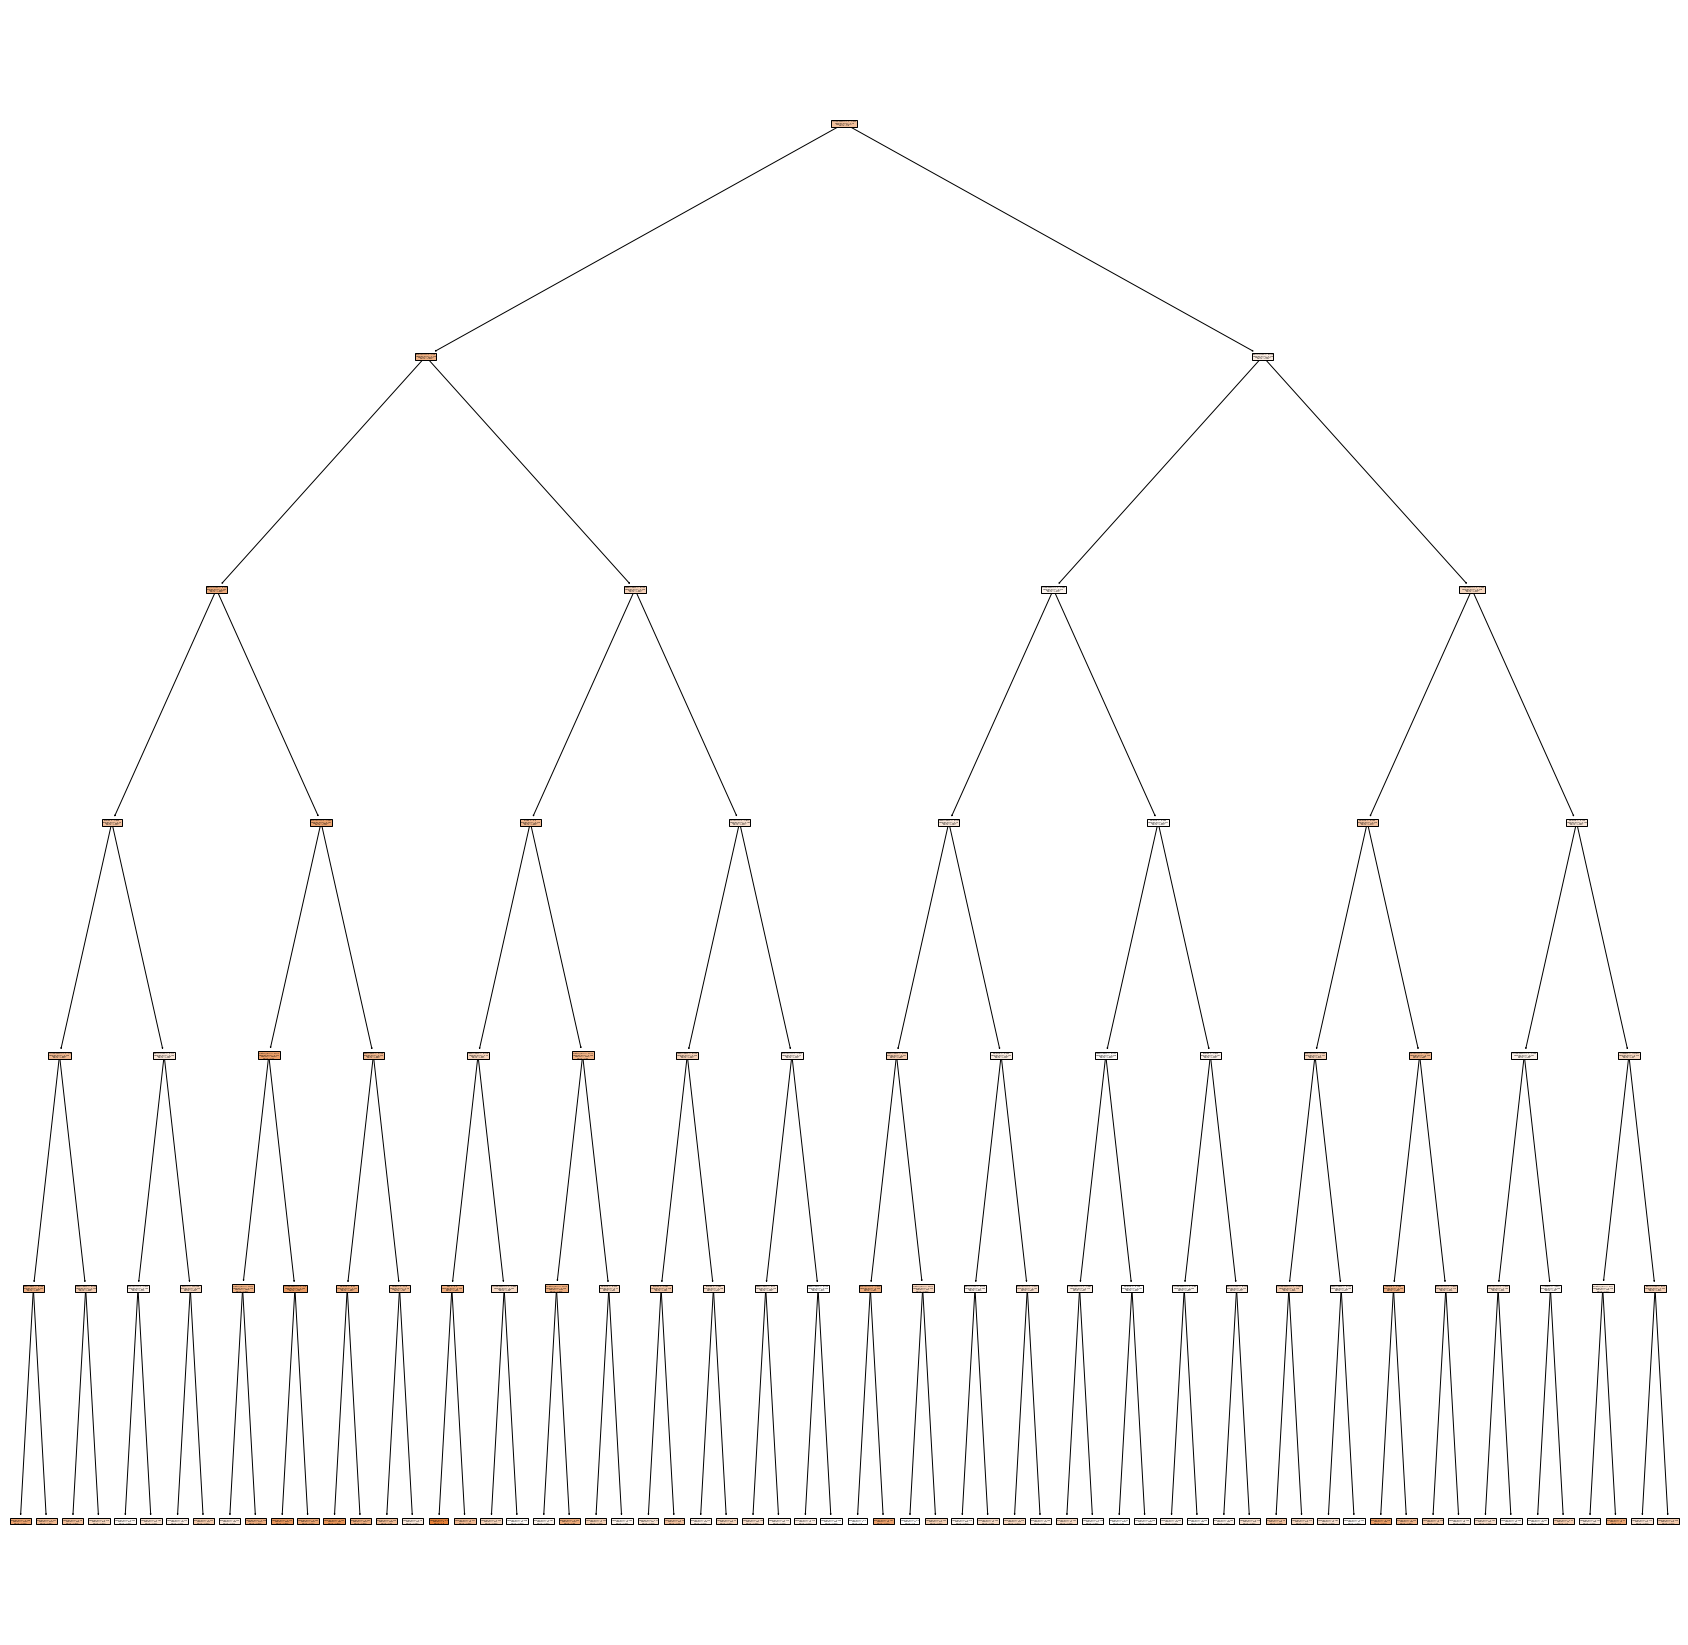

In [16]:
plt.figure(figsize = (30, 30))
plot = tree.plot_tree(dtr_reg, feature_names = features, filled = True, max_depth = 6)
plt.show()

In [16]:
# text_tree = tree.export_text(dtr_reg, feature_names = features)
# print(text_tree)

--------------------------------------------------------------

## Model 3: Random Forest

--------------------------------------------------------------

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [18]:
rfreg = RandomForestRegressor(n_estimators = 200, max_features = 6, oob_score = True, random_state = 1)
rfreg.fit(x, y)

RandomForestRegressor(max_features=6, n_estimators=200, oob_score=True,
                      random_state=1)

In [19]:
print((rfreg.oob_score_))

0.4111765495733952
